In [99]:

from __future__ import absolute_import, division, print_function

import pathlib
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [100]:
ls

21f_1.ipynb                      21f_smpl_limited.ipynb
21f_3_sets.csv                   21f_vod_simplified.ipynb
21f_data_phy_only_no_talent.csv  src/
21f_est_simplified.ipynb         tutorials/
21f_phy_simplified.ipynb


In [120]:
col_list=[ 'Box Office',
           #'EST Date', 
           #'EST Date Week Num', 
           #'EST to TH',
           #'EST W1 Units', 
           #'VOD Date',  
           #'VOD Date Week Num', 
           'VOD to TH',
           'VOD W1 Units', 
           #'Studio', 
           #'Rating', 
           #'TH Date Week Num', 
           #'Box Office', 
           'Franchise', 
           'Count of Awards',
           ' Action',  
           ' Adventure', 
           'Animation', 
           ' Biography', 
           ' Comedy', 
           ' Crime',
           'Documentary', 
           ' Drama', 
           ' Family', 
           ' Fantasy', 
           ' History', 
           ' Horror',
           ' Music', 
           ' Musical', 
           ' Mystery', 
           ' Romance', 
           ' Sci-Fi', 
           ' Short',
           ' Sport',  
           ' Thriller', 
           ' War'
           ]

In [136]:
dataset = pd.read_csv("21f_3_sets.csv")
dataset.tail()

,Title,Physical Date,PHY Date Week Num,PHY to TH,Physical W1 Units,EST Date,EST Date Week Num,EST to TH,EST W1 Units,VOD Date,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War
714,YOUNG MESSIAH,6/14/2016,25,95,17816,5/24/2016,22,74,4592,6/14/2016,...,0,0,0,0,0,0,0,0,0,0
715,YOUTH,3/1/2016,10,88,635,2/16/2016,8,74,4397,3/1/2016,...,0,1,0,0,1,0,0,0,0,0
716,ZOOKEEPERS WIFE,7/4/2017,27,88,39313,6/20/2017,25,74,24601,7/4/2017,...,0,0,0,0,0,0,0,0,0,1
717,ZOOLANDER 2,5/24/2016,22,102,45106,5/3/2016,19,81,57828,5/24/2016,...,0,0,0,0,0,0,0,0,0,0
718,ZOOTOPIA,6/7/2016,24,95,1601855,6/7/2016,24,95,351712,6/7/2016,...,0,0,0,1,0,0,0,0,0,0


In [137]:
dataset=dataset.loc[:, col_list]

In [138]:
dataset.columns

Index(['Box Office', 'VOD to TH', 'VOD W1 Units', 'Franchise',
       'Count of Awards', ' Action', ' Adventure', 'Animation', ' Biography',
       ' Comedy', ' Crime', 'Documentary', ' Drama', ' Family', ' Fantasy',
       ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' Romance',
       ' Sci-Fi', ' Short', ' Sport', ' Thriller', ' War'],
      dtype='object')

In [139]:
dataset.isna().sum()

Box Office         0
VOD to TH          0
VOD W1 Units       0
Franchise          0
Count of Awards    0
 Action            0
 Adventure         0
Animation          0
 Biography         0
 Comedy            0
 Crime             0
Documentary        0
 Drama             0
 Family            0
 Fantasy           0
 History           0
 Horror            0
 Music             0
 Musical           0
 Mystery           0
 Romance           0
 Sci-Fi            0
 Short             0
 Sport             0
 Thriller          0
 War               0
dtype: int64

In [140]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

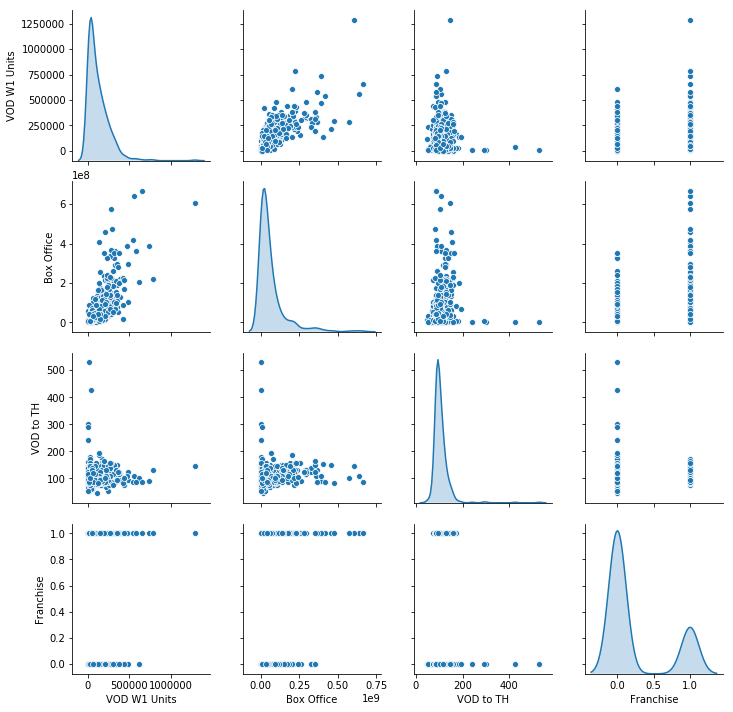

In [141]:
sns.pairplot(train_dataset[["VOD W1 Units", "Box Office", "VOD to TH", "Franchise"]], diag_kind="kde" )

In [142]:
dataset['box_vs_vodtoth_lag']=dataset['Box Office']/dataset['VOD to TH']

In [143]:
train_stats = train_dataset.describe()
train_stats.pop("VOD W1 Units")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Box Office,575.0,6.342733e+07,9.081473e+07,2002036.0,10443536.5,32492859.0,73734187.0,665642897.0
VOD to TH,575.0,1.055826e+02,3.272549e+01,46.0,88.0,97.0,116.0,529.0
Franchise,575.0,2.452174e-01,4.305906e-01,0.0,0.0,0.0,0.0,1.0
Count of Awards,575.0,3.043478e-01,1.660013e+00,0.0,0.0,0.0,0.0,24.0
Action,575.0,3.113043e-01,4.634301e-01,0.0,0.0,0.0,1.0,1.0
Adventure,575.0,2.695652e-01,4.441203e-01,0.0,0.0,0.0,1.0,1.0
Animation,575.0,8.521739e-02,2.794480e-01,0.0,0.0,0.0,0.0,1.0
Biography,575.0,1.373913e-01,3.445597e-01,0.0,0.0,0.0,0.0,1.0
Comedy,575.0,3.773913e-01,4.851561e-01,0.0,0.0,0.0,1.0,1.0
Crime,575.0,1.686957e-01,3.748089e-01,0.0,0.0,0.0,0.0,1.0


In [144]:
train_labels = train_dataset.pop('VOD W1 Units')
test_labels = test_dataset.pop('VOD W1 Units')

In [145]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [131]:
normed_train_data.shape

(575, 25)

In [146]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [147]:
model=build_model()

In [148]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 19,969
Trainable params: 19,969
Non-trainable params: 0
_________________________________________________________________


In [149]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.5272941 ],
       [ 0.39541546],
       [ 0.45150855],
       [ 0.7344612 ],
       [ 0.01152223],
       [-0.21078436],
       [ 0.55967164],
       [ 0.08086342],
       [ 0.42643088],
       [ 0.30915076]], dtype=float32)

In [150]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [151]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................

In [152]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
424,6.387369e+09,52884.992188,6.387369e+09,4.642060e+09,53916.488281,4.642060e+09,424
425,6.379953e+09,52890.378906,6.379952e+09,4.642120e+09,53917.531250,4.642120e+09,425
426,6.385873e+09,52891.582031,6.385873e+09,4.644470e+09,53878.871094,4.644470e+09,426
427,6.380336e+09,52886.226562,6.380336e+09,4.641260e+09,53857.195312,4.641260e+09,427
428,6.375893e+09,52914.324219,6.375893e+09,4.643419e+09,53849.652344,4.643420e+09,428


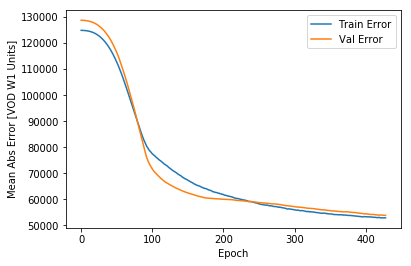

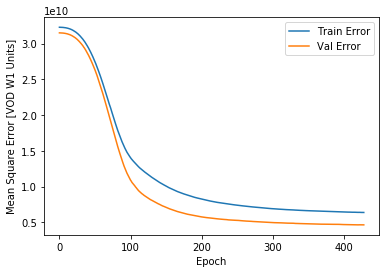

In [153]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [VOD W1 Units]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [VOD W1 Units]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [154]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} phy_w1_units".format(mae))

Testing set Mean Abs Error: 62672.37 phy_w1_units


In [155]:
mae/train_labels.mean()

0.49869282357427663

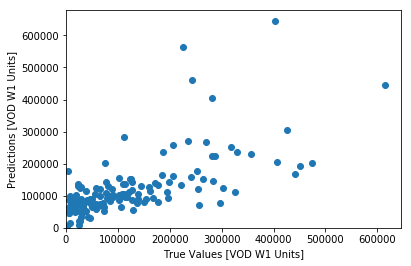

In [96]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [VOD W1 Units]')
plt.ylabel('Predictions [VOD W1 Units]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


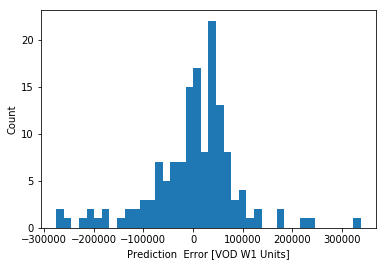

In [97]:
error = test_predictions - test_labels
plt.hist(error, bins = 40)
plt.xlabel("Prediction  Error [VOD W1 Units]")
_ = plt.ylabel("Count")

In [1]:
ls

21f_1.ipynb                      src/             Untitled2.ipynb
21f_data_phy_only_no_talent.csv  tutorials/
21f_simplified.ipynb             Untitled1.ipynb


In [23]:
pd_predictions=pd.DataFrame(test_predictions)

NameError: name 'test_predictions' is not defined

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [311]:
pd_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
0    144 non-null float32
dtypes: float32(1)
memory usage: 656.0 bytes


In [272]:
pd_predictions=pd_predictions.astype(int)

In [273]:
pd_predictions.head(1)

,0
0,13779


In [274]:
print(test_predictions.shape)
test_predictions[:1]

(144,)


array([13779.403], dtype=float32)

In [275]:
print(test_labels.shape)
test_labels[:1]

(144,)


9    6387
Name: Physical W1 Units, dtype: int64

In [276]:
pd_test_labels=pd.DataFrame(test_labels)

In [ ]:
pd_test_labels.head

In [241]:
real_mistakes=np.subtract(pd_test_labels,pd_predictions)

In [ ]:
print (real_mistakes.info())
print(real_mistakes)

In [281]:
abs_real_mistakes=np.absolute(real_mistakes)